In [360]:
import psutil
p = psutil.Process()
p.cpu_affinity([0, 1, 2, 3])  # Use CPU cores 0, 1, 2, 3

In [361]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras as k

In [362]:
def plot_history(hst):
    plt.figure(figsize=(13,4))

    plt.subplot(1,2,1)
    plt.plot(hst.history['loss'],label='train')
    plt.plot(hst.history['val_loss'],label='test')
    plt.title("Loss")

    plt.subplot(1,2,2)
    plt.plot([round(100*e,2) for e in hst.history['sparse_categorical_accuracy']], label = 'train')
    plt.plot([round(100*e,2) for e in hst.history['val_sparse_categorical_accuracy']], label = 'test')
    plt.title("Accuracy")

    plt.ylim(0,100)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [363]:
# from tensorflow.keras.datasets import mnist
from keras._tf_keras.keras.datasets import fashion_mnist

# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізуємо значення пікселів
x_train = x_train / 255
x_test = x_test / 255
y_train = y_train
y_test = y_test

x_train.shape,y_train.shape, x_test.shape, y_test.shape
# ((60000, 28, 28), (60000,), (10000, 28, 28), (10000,)) - original

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [374]:
epochs = 20
n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 128 # кількість нейронів 1-го шару
num_classes = 10 # загальна кількість класів
batch_size = 32
learning_rate = 0.0005 #+++
activation_function_l1 = 'tanh'
activation_function_l2 = 'tanh'
dropout_rate = 0.0
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

metrics = tf.keras.metrics.SparseCategoricalAccuracy()

In [375]:
model = k.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28)), # вхідних даних Х
            tf.keras.layers.Dense(n_hidden_1,activation=activation_function_l1), # 1ий шар     
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(n_hidden_2,activation=activation_function_l2), # 2ий шар  
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(num_classes, activation='softmax'),    #кількість класів які прогнозуємо У
            ])

model.compile(           
    loss=loss_func,
    optimizer=optimizer,
    metrics=[metrics]
)
model.summary()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_89 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_241 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_242 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_243 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6290 - sparse_categorical_accuracy: 0.7780 - val_loss: 0.4378 - val_sparse_categorical_accuracy: 0.8406
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3746 - sparse_categorical_accuracy: 0.8648 - val_loss: 0.3785 - val_sparse_categorical_accuracy: 0.8637
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.3439 - sparse_categorical_accuracy: 0.8745 - val_loss: 0.3583 - val_sparse_categorical_accuracy: 0.8695
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.3022 - sparse_categorical_accuracy: 0.8886 - val_loss: 0.3470 - val_sparse_categorical_accuracy: 0.8737
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.2889 - sparse_categorical_accuracy: 0.8932 - val_loss: 0.3436 - val_sparse_categorical_accuracy: 0.8734
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.2714 - sparse_categorical_accuracy: 0.8994 - val_loss: 0.3365 - val_sparse_categorical_accuracy: 0.879

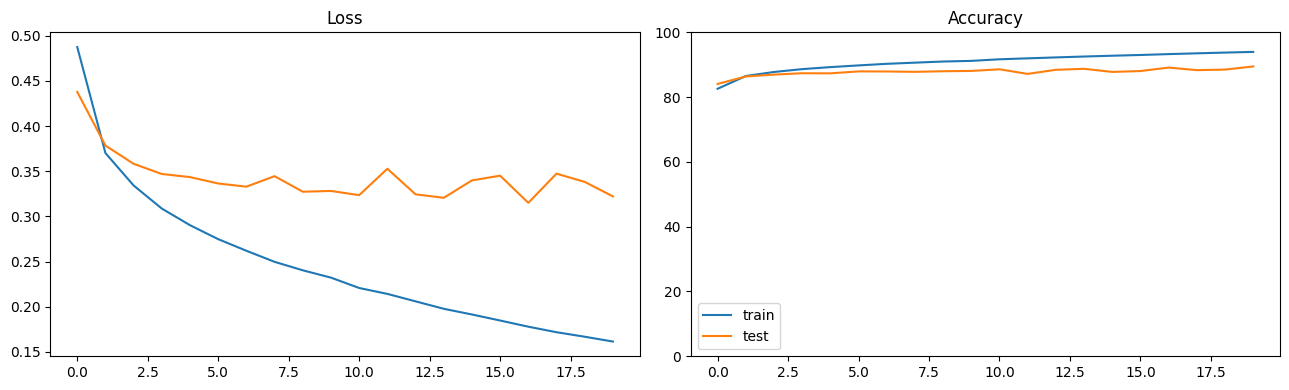

In [376]:
history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))
plot_history(history)

**Візуалізація**

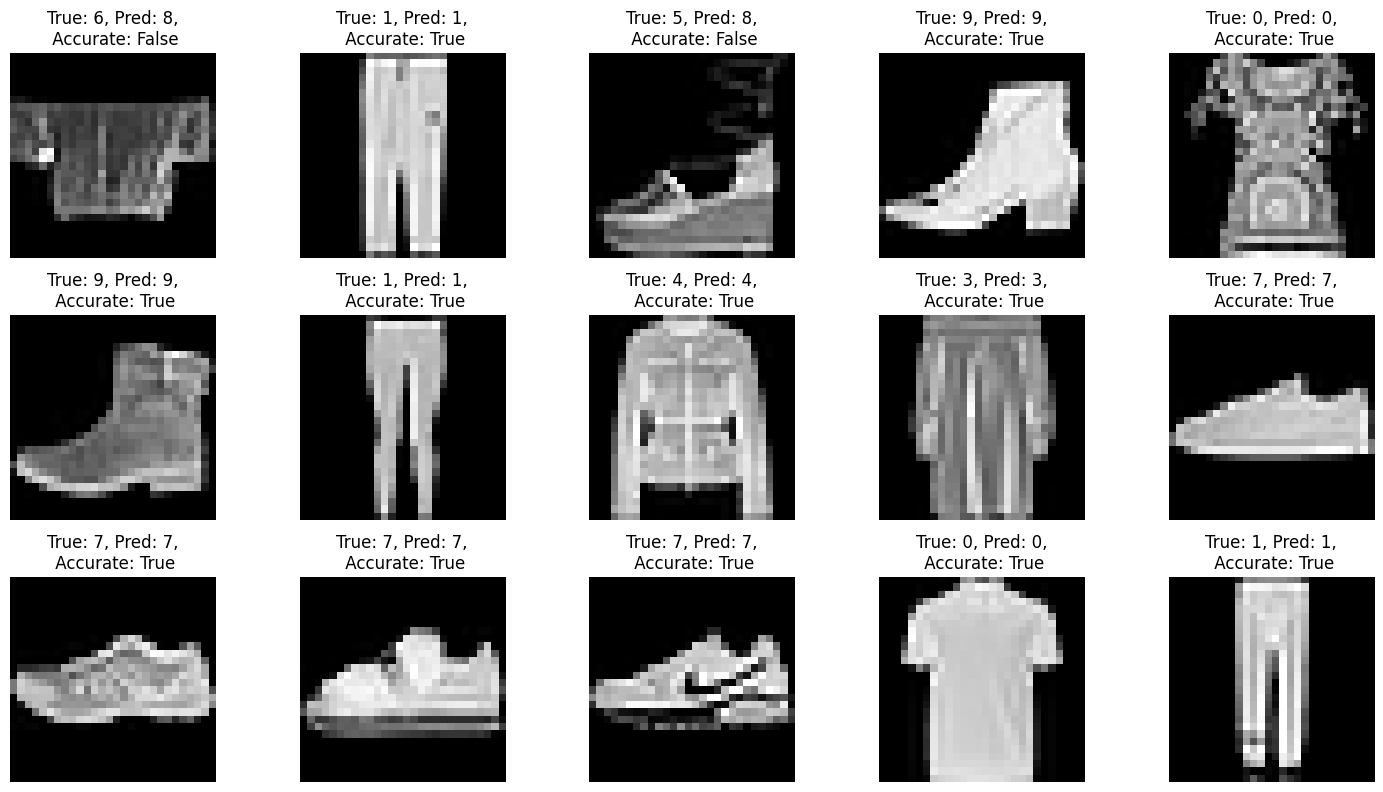

In [377]:
rows = 3
random_indices = np.random.choice(len(x_test), rows*5, replace=False)
random_images = x_test[random_indices]
random_labels = y_test[random_indices]
random_preds = model(x_test[random_indices])
random_pred_labels = tf.argmax(random_preds, axis=1)

plt.figure(figsize=(16, 8))
for i, (image, true_label, pred_label) in enumerate(zip(random_images, random_labels, random_pred_labels)):
    plt.subplot(rows, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True: {true_label}, Pred: {pred_label},\n Accurate: {true_label==pred_label}',)
    plt.axis('off')
    plt.tight_layout(pad = 1.0)
plt.show()

**Аналіз по класам**

In [378]:
from sklearn.metrics import classification_report

y_pred = model(x_test)
y_pred_labels = tf.argmax(y_pred, axis=1).numpy()

for y_class in np.unique(y_test):
    indices = np.where(y_test == y_class)[0]
    y_class_true = y_test[indices]
    y_class_pred = y_pred_labels[indices]
    print(f"Class: {y_class}")
    print(classification_report(y_class_true, y_class_pred, labels=[y_class], target_names=[str(y_class)]))


Class: 0
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1000

   micro avg       1.00      0.87      0.93      1000
   macro avg       1.00      0.87      0.93      1000
weighted avg       1.00      0.87      0.93      1000

Class: 1
              precision    recall  f1-score   support

           1       1.00      0.97      0.99      1000

   micro avg       1.00      0.97      0.99      1000
   macro avg       1.00      0.97      0.99      1000
weighted avg       1.00      0.97      0.99      1000

Class: 2
              precision    recall  f1-score   support

           2       1.00      0.82      0.90      1000

   micro avg       1.00      0.82      0.90      1000
   macro avg       1.00      0.82      0.90      1000
weighted avg       1.00      0.82      0.90      1000

Class: 3
              precision    recall  f1-score   support

           3       1.00      0.91      0.95      1000

   micro avg       1.00      0.91  

результати:
1. 
input:
    epochs = 25
    n_hidden_1 = 128 # кількість нейронів 1-го шару
    n_hidden_2 = 64 # кількість нейронів 2-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 32
    learning_rate = 0.01 # швидкість навчання нейронної мережі
    activation_function_l1 = 'relu'
    activation_function_l2 = 'relu'
    loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
output:
    loss: 0.3257 - sparse_categorical_accuracy: 0.8841 - val_loss: 0.4760 - val_sparse_categorical_accuracy: 0.8498

2. input:
    epochs = 25
    n_hidden_1 = 128 # кількість нейронів 1-го шару
    n_hidden_2 = 128 # кількість нейронів 2-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 32
    learning_rate = 0.01 # швидкість навчання нейронної мережі
    activation_function_l1 = 'relu'
    activation_function_l2 = 'relu'
    loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
output:
    loss: 0.3474 - sparse_categorical_accuracy: 0.8744 - val_loss: 0.4343 - val_sparse_categorical_accuracy: 0.8550

3. input:
    epochs = 50
    n_hidden_1 = 128 # кількість нейронів 1-го шару
    n_hidden_2 = 24 # кількість нейронів 2-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 32
    learning_rate = 0.01 # швидкість навчання нейронної мережі
    activation_function_l1 = 'relu'
    activation_function_l2 = 'relu'
    loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
output:
    loss: 0.3100 - sparse_categorical_accuracy: 0.8930 - val_loss: 0.4830 - val_sparse_categorical_accuracy: 0.8588

4. input:
    epochs = 20
    n_hidden_1 = 64 # кількість нейронів 1-го шару
    n_hidden_2 = 24 # кількість нейронів 2-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 32
    learning_rate = 0.01 # швидкість навчання нейронної мережі
    activation_function_l1 = 'relu'
    activation_function_l2 = 'relu'
    loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
output:
    loss: 0.3360 - sparse_categorical_accuracy: 0.8792 - val_loss: 0.4432 - val_sparse_categorical_accuracy: 0.8578
5. 1 layer
input
    epochs = 20
    n_hidden_1 = 64 # кількість нейронів 1-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 32
    learning_rate = 0.01 # швидкість навчання нейронної мережі
    activation_function_l1 = 'relu'
    activation_function_l2 = 'relu'
    loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
output
    loss: 0.3328 - sparse_categorical_accuracy: 0.8801 - val_loss: 0.5059 - val_sparse_categorical_accuracy: 0.8347

6. input
    epochs = 20
    n_hidden_1 = 64 # кількість нейронів 1-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 32
    learning_rate = 0.001 #+++
    activation_function_l1 = 'relu'
    loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
output:
    loss: 0.1960 - sparse_categorical_accuracy: 0.9271 - val_loss: 0.3666 - val_sparse_categorical_accuracy: 0.8804
7. input:
    epochs = 20
    n_hidden_1 = 64 # кількість нейронів 1-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 32
    learning_rate = 0.001 # +++
    activation_function_l1 = 'sigmoid' ++
    loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
output:
    loss: 0.2160 - sparse_categorical_accuracy: 0.9219 - val_loss: 0.3390 - val_sparse_categorical_accuracy: 0.8801

8.
input:
    epochs = 20
    n_hidden_1 = 64 # кількість нейронів 1-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 32
    learning_rate = 0.001 # швидкість навчання нейронної мережі
    activation_function_l1 = 'tanh'
    loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    metrics = tf.keras.metrics.SparseCategoricalAccuracy()
output:
    loss: 0.2023 - sparse_categorical_accuracy: 0.9266 - val_loss: 0.3519 - val_sparse_categorical_accuracy: 0.8822

9. input:
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
   output:
    loss: 0.4820 - sparse_categorical_accuracy: 0.8356 - val_loss: 0.5083 - val_sparse_categorical_accuracy: 0.8220

10. 
input:
    epochs = 10
    n_hidden_1 = 128 # кількість нейронів 1-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 32
    learning_rate = 0.001 # швидкість навчання нейронної мережі
    activation_function_l1 = 'relu'
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
output:
    loss: 0.2658 - sparse_categorical_accuracy: 0.9066 - val_loss: 0.4480 - val_sparse_categorical_accuracy: 0.8683

11.
input:
    epochs = 10
    n_hidden_1 = 128 # кількість нейронів 1-го шару
    n_hidden_2 = 64 # кількість нейронів 2-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 32
    learning_rate = 0.005 # швидкість навчання нейронної мережі
    activation_function_l1 = 'relu'
    activation_function_l2 = 'relu'
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
output:
    loss: 0.4862 - sparse_categorical_accuracy: 0.8498 - val_loss: 0.6670 - val_sparse_categorical_accuracy: 0.8318

12. 
input:
    epochs = 10
    n_hidden_1 = 128 # кількість нейронів 1-го шару
    n_hidden_2 = 64 # кількість нейронів 2-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 32
    learning_rate = 0.005 # швидкість навчання нейронної мережі
    activation_function_l1 = 'relu'
    activation_function_l2 = 'relu'

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
output:
    loss: 0.2952 - sparse_categorical_accuracy: 0.8906 - val_loss: 0.4007 - val_sparse_categorical_accuracy: 0.8646

13. input:
    epochs = 10
    n_hidden_1 = 128 # кількість нейронів 1-го шару
    n_hidden_2 = 64 # кількість нейронів 2-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 32
    learning_rate = 0.005 # швидкість навчання нейронної мережі
    activation_function_l1 = 'leaky_relu'
    activation_function_l2 = 'leaky_relu'
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
output:
    loss: 0.3235 - sparse_categorical_accuracy: 0.8811 - val_loss: 0.4027 - val_sparse_categorical_accuracy: 0.8671

14. input
    epochs = 10
    n_hidden_1 = 128 # кількість нейронів 1-го шару
    n_hidden_2 = 64 # кількість нейронів 2-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 32
    learning_rate = 0.005 # швидкість навчання нейронної мережі
    activation_function_l1 = 'sigmoid'
    activation_function_l2 = 'sigmoid'
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
output:
    loss: 0.2961 - sparse_categorical_accuracy: 0.8884 - val_loss: 0.3857 - val_sparse_categorical_accuracy: 0.8594

15. input:
    epochs = 10
    n_hidden_1 = 128 # кількість нейронів 1-го шару
    n_hidden_2 = 64 # кількість нейронів 2-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 64
    learning_rate = 0.001 # швидкість навчання нейронної мережі
    activation_function_l1 = 'sigmoid'
    activation_function_l2 = 'sigmoid'
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
output:
    loss: 0.2640 - sparse_categorical_accuracy: 0.9047 - val_loss: 0.3451 - val_sparse_categorical_accuracy: 0.8742
16.
input:
    epochs = 20
    n_hidden_1 = 64 # кількість нейронів 1-го шару
    n_hidden_2 = 64 # кількість нейронів 2-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 64
    learning_rate = 0.001 # швидкість навчання нейронної мережі
    activation_function_l1 = 'sigmoid'
    activation_function_l2 = 'sigmoid'
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
output:
    loss: 0.2231 - sparse_categorical_accuracy: 0.9184 - val_loss: 0.3362 - val_sparse_categorical_accuracy: 0.8807

17.
input:
    epochs = 60
    n_hidden_1 = 64 # кількість нейронів 1-го шару
    n_hidden_2 = 64 # кількість нейронів 2-го шару
    num_classes = 10 # загальна кількість класів
    batch_size = 32
    learning_rate = 0.0005 # швидкість навчання нейронної мережі
    activation_function_l1 = 'sigmoid'
    activation_function_l2 = 'sigmoid'
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
output:
    loss: 0.1396 - sparse_categorical_accuracy: 0.9511 - val_loss: 0.3746 - val_sparse_categorical_accuracy: 0.8860

18.
    input:
        epochs = 30
        n_hidden_1 = 128 # кількість нейронів 1-го шару
        n_hidden_2 = 128 # кількість нейронів 1-го шару
        num_classes = 10 # загальна кількість класів
        batch_size = 32
        learning_rate = 0.0005 #+++
        activation_function_l1 = 'tanh'
        activation_function_l2 = 'tanh'
        dropout_rate = 0.2
        loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

        metrics = tf.keras.metrics.SparseCategoricalAccuracy()
    output:
        loss: 0.2448 - sparse_categorical_accuracy: 0.9083 - val_loss: 0.3203 - val_sparse_categorical_accuracy: 0.8849


